In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load the dataset
df = pd.read_csv('car data.csv')

# Display first 5 rows
print("Dataset Head:")
display(df.head())

Dataset Head:


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
# 1. Feature Engineering: Create 'Age' column
# Assuming the current year is 2024
df['Age'] = 2024 - df['Year']

# 2. Drop columns that won't be used
# We drop 'Car_Name' (too many unique text values) and 'Year' (replaced by Age)
df.drop(['Car_Name', 'Year'], axis=1, inplace=True)

# 3. Encoding Categorical Data
# Convert Fuel_Type, Selling_type, and Transmission into numerical columns (0s and 1s)
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

print("Columns after preprocessing:")
print(df.columns.tolist())

Columns after preprocessing:
['Selling_Price', 'Present_Price', 'Driven_kms', 'Owner', 'Age', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual', 'Transmission_Manual']


In [4]:
# Separate Features (X) and Target (y)
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Split into Training and Testing sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


Model Accuracy (R2 Score): 95.95%


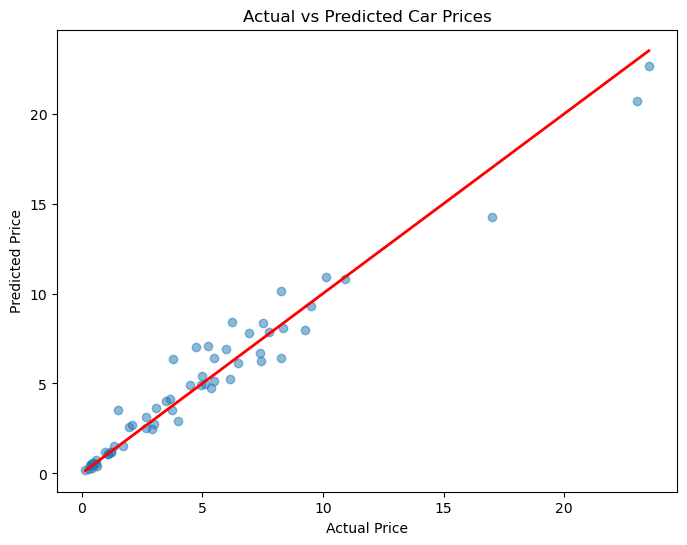

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared score
score = r2_score(y_test, y_pred)*100
print(f"Model Accuracy (R2 Score): {score:.2f}%")

# Visualize Actual vs Predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()

In [14]:
# Select a single row from the test set to test prediction
# Using double brackets [[0]] keeps it as a DataFrame with column names
sample_car = X_test.iloc[[0]]

# Predict the price
predicted_price = model.predict(sample_car)
actual_price = y_test.iloc[0]

print("\n--- Prediction Result ---")
print(f"Predicted Selling Price: {predicted_price[0]:.2f} Lakhs")
print(f"Actual Selling Price:    {actual_price:.2f} Lakhs")


--- Prediction Result ---
Predicted Selling Price: 0.44 Lakhs
Actual Selling Price:    0.35 Lakhs
